Import Semua Packages/Library yang Digunakan

In [195]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


## Data Wrangling

Gathering Data

In [196]:
Nongzhanguan_df = pd.read_csv("PRSA_Data_Nongzhanguan_20130301-20170228.csv")
Nongzhanguan_df

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,5.0,14.0,4.0,12.0,200.0,85.0,-0.5,1024.5,-21.4,0.0,NNW,5.7,Nongzhanguan
1,2,2013,3,1,1,8.0,12.0,6.0,14.0,200.0,84.0,-0.7,1025.1,-22.1,0.0,NW,3.9,Nongzhanguan
2,3,2013,3,1,2,3.0,6.0,5.0,14.0,200.0,83.0,-1.2,1025.3,-24.6,0.0,NNW,5.3,Nongzhanguan
3,4,2013,3,1,3,5.0,5.0,5.0,14.0,200.0,84.0,-1.4,1026.2,-25.5,0.0,N,4.9,Nongzhanguan
4,5,2013,3,1,4,5.0,5.0,6.0,21.0,200.0,77.0,-1.9,1027.1,-24.5,0.0,NNW,3.2,Nongzhanguan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35059,35060,2017,2,28,19,14.0,21.0,3.0,27.0,400.0,72.0,12.5,1013.5,-16.2,0.0,NW,2.4,Nongzhanguan
35060,35061,2017,2,28,20,18.0,27.0,3.0,37.0,400.0,59.0,11.6,1013.6,-15.1,0.0,WNW,0.9,Nongzhanguan
35061,35062,2017,2,28,21,15.0,39.0,5.0,50.0,600.0,41.0,10.8,1014.2,-13.3,0.0,NW,1.1,Nongzhanguan
35062,35063,2017,2,28,22,11.0,35.0,6.0,49.0,500.0,41.0,10.5,1014.4,-12.9,0.0,NNW,1.2,Nongzhanguan


## Assessing Data

Memeriksa tipe data dari setiap kolom pada Nongzhanguan_df menggunakan method info()

In [197]:
Nongzhanguan_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   No       35064 non-null  int64  
 1   year     35064 non-null  int64  
 2   month    35064 non-null  int64  
 3   day      35064 non-null  int64  
 4   hour     35064 non-null  int64  
 5   PM2.5    34436 non-null  float64
 6   PM10     34624 non-null  float64
 7   SO2      34618 non-null  float64
 8   NO2      34372 non-null  float64
 9   CO       33858 non-null  float64
 10  O3       34558 non-null  float64
 11  TEMP     35044 non-null  float64
 12  PRES     35044 non-null  float64
 13  DEWP     35044 non-null  float64
 14  RAIN     35044 non-null  float64
 15  wd       34986 non-null  object 
 16  WSPM     35050 non-null  float64
 17  station  35064 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 4.8+ MB


Memeriksa missing values pada Nongzhanguan_df menggunakan kombinasi method isna() dan method sum()

In [198]:
Nongzhanguan_df.isna().sum()

No            0
year          0
month         0
day           0
hour          0
PM2.5       628
PM10        440
SO2         446
NO2         692
CO         1206
O3          506
TEMP         20
PRES         20
DEWP         20
RAIN         20
wd           78
WSPM         14
station       0
dtype: int64

Memeriksa Duplikasi Data yang pada Nongzhanguan_df menggunakan method duplicated()

In [199]:
print("Jumlah duplikasi: ", Nongzhanguan_df.duplicated().sum())

Jumlah duplikasi:  0


Memeriksa parameter statistik dari kolom numerik yang terdapat pada Nongzhanguan_df menggunakan method describe()

In [200]:

Nongzhanguan_df.describe()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
count,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,34436.000000,34624.000000,34618.000000,34372.000000,33858.000000,34558.000000,35044.000000,35044.000000,35044.000000,35044.000000,35050.000000
mean,17532.500000,2014.662560,6.522930,15.729637,11.500000,84.838483,108.991096,18.689242,58.097172,1324.350198,58.534682,13.671490,1012.547419,2.447535,0.064020,1.860785
std,10122.249256,1.177213,3.448752,8.800218,6.922285,86.225344,95.341177,24.280665,36.297740,1245.166124,58.401448,11.458418,10.266059,13.810696,0.786282,1.280368
min,1.000000,2013.000000,1.000000,1.000000,0.000000,2.000000,2.000000,0.571200,2.000000,100.000000,0.214200,-16.800000,987.100000,-35.300000,0.000000,0.000000
25%,8766.750000,2014.000000,4.000000,8.000000,5.750000,22.000000,38.000000,3.000000,29.000000,500.000000,10.000000,3.100000,1004.000000,-8.800000,0.000000,1.000000
50%,17532.500000,2015.000000,7.000000,16.000000,11.500000,59.000000,85.000000,9.000000,51.000000,900.000000,45.000000,14.600000,1012.200000,3.000000,0.000000,1.500000
75%,26298.250000,2016.000000,10.000000,23.000000,17.250000,116.000000,149.000000,23.000000,80.000000,1600.000000,84.000000,23.500000,1020.900000,15.000000,0.000000,2.400000
max,35064.000000,2017.000000,12.000000,31.000000,23.000000,844.000000,995.000000,257.000000,273.000000,10000.000000,390.000000,41.100000,1042.000000,28.800000,46.400000,10.500000


## Cleaning Data

Membuat kolom baru datetime

In [201]:
Nongzhanguan_df["datetime"] = pd.to_datetime(Nongzhanguan_df[["year", "month", "day", "hour"]])
Nongzhanguan_df.sample(5)

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station,datetime
16132,16133,2015,1,2,4,47.0,69.0,24.0,76.0,1300.0,3.0,-2.0,1027.0,-18.6,0.0,ENE,1.3,Nongzhanguan,2015-01-02 04:00:00
20341,20342,2015,6,26,13,69.0,69.0,2.0,19.0,900.0,204.0,27.5,996.3,19.6,0.0,SE,2.2,Nongzhanguan,2015-06-26 13:00:00
12610,12611,2014,8,8,10,82.0,134.0,22.0,59.0,1400.0,95.0,29.3,1005.4,17.8,0.0,N,1.2,Nongzhanguan,2014-08-08 10:00:00
30008,30009,2016,8,2,8,55.0,66.0,2.0,36.0,1200.0,41.0,28.3,1006.4,23.9,0.0,NE,1.9,Nongzhanguan,2016-08-02 08:00:00
31063,31064,2016,9,15,7,85.0,85.0,2.0,66.0,800.0,7.0,19.5,1011.6,18.7,0.0,E,0.8,Nongzhanguan,2016-09-15 07:00:00


Menampilkan missing values pada kolom PM2.5

In [202]:
Nongzhanguan_df[Nongzhanguan_df["PM2.5"].isna()]

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station,datetime
1258,1259,2013,4,22,10,NaN,175.0,49.0,68.0,1100.0,33.0,14.1,1011.2,5.4,0.0,S,3.5,Nongzhanguan,2013-04-22 10:00:00
1259,1260,2013,4,22,11,NaN,205.0,51.0,70.0,1200.0,50.0,14.5,1011.0,6.1,0.0,SSW,3.1,Nongzhanguan,2013-04-22 11:00:00
1260,1261,2013,4,22,12,NaN,196.0,57.0,62.0,1300.0,55.0,14.3,1010.9,6.1,0.0,SSW,3.1,Nongzhanguan,2013-04-22 12:00:00
1331,1332,2013,4,25,11,NaN,73.0,3.0,23.0,400.0,90.0,20.0,1009.7,-8.4,0.0,NNW,5.2,Nongzhanguan,2013-04-25 11:00:00
1620,1621,2013,5,7,12,NaN,NaN,46.0,109.0,2200.0,25.0,28.8,1011.3,11.4,0.0,WSW,1.4,Nongzhanguan,2013-05-07 12:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35026,35027,2017,2,27,10,NaN,NaN,NaN,NaN,NaN,NaN,6.8,1019.3,-5.2,0.0,E,1.9,Nongzhanguan,2017-02-27 10:00:00
35029,35030,2017,2,27,13,NaN,6.0,40.0,93.0,200.0,32.0,14.0,1015.8,-5.2,0.0,SSE,1.8,Nongzhanguan,2017-02-27 13:00:00
35042,35043,2017,2,28,2,NaN,NaN,NaN,NaN,NaN,NaN,8.6,1016.0,-10.9,0.0,NNE,0.9,Nongzhanguan,2017-02-28 02:00:00
35054,35055,2017,2,28,14,NaN,6.0,2.0,10.0,200.0,94.0,14.6,1013.3,-15.6,0.0,N,3.6,Nongzhanguan,2017-02-28 14:00:00


Melakukan interpolasi pada kolom PM2.5

In [203]:
Nongzhanguan_df["PM2.5"].interpolate(method='linear', limit_direction='backward', inplace=True)
Nongzhanguan_df

C:\Users\User\AppData\Local\Temp\ipykernel_4336\2970888148.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  Nongzhanguan_df["PM2.5"].interpolate(method='linear', limit_direction='backward', inplace=True)


,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station,datetime
0,1,2013,3,1,0,5.0,14.0,4.0,12.0,200.0,85.0,-0.5,1024.5,-21.4,0.0,NNW,5.7,Nongzhanguan,2013-03-01 00:00:00
1,2,2013,3,1,1,8.0,12.0,6.0,14.0,200.0,84.0,-0.7,1025.1,-22.1,0.0,NW,3.9,Nongzhanguan,2013-03-01 01:00:00
2,3,2013,3,1,2,3.0,6.0,5.0,14.0,200.0,83.0,-1.2,1025.3,-24.6,0.0,NNW,5.3,Nongzhanguan,2013-03-01 02:00:00
3,4,2013,3,1,3,5.0,5.0,5.0,14.0,200.0,84.0,-1.4,1026.2,-25.5,0.0,N,4.9,Nongzhanguan,2013-03-01 03:00:00
4,5,2013,3,1,4,5.0,5.0,6.0,21.0,200.0,77.0,-1.9,1027.1,-24.5,0.0,NNW,3.2,Nongzhanguan,2013-03-01 04:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35059,35060,2017,2,28,19,14.0,21.0,3.0,27.0,400.0,72.0,12.5,1013.5,-16.2,0.0,NW,2.4,Nongzhanguan,2017-02-28 19:00:00
35060,35061,2017,2,28,20,18.0,27.0,3.0,37.0,400.0,59.0,11.6,1013.6,-15.1,0.0,WNW,0.9,Nongzhanguan,2017-02-28 20:00:00
35061,35062,2017,2,28,21,15.0,39.0,5.0,50.0,600.0,41.0,10.8,1014.2,-13.3,0.0,NW,1.1,Nongzhanguan,2017-02-28 21:00:00
35062,35063,2017,2,28,22,11.0,35.0,6.0,49.0,500.0,41.0,10.5,1014.4,-12.9,0.0,NNW,1.2,Nongzhanguan,2017-02-28 22:00:00


Menampilkan Missing Values Pada Kolom PM10

In [204]:
Nongzhanguan_df[Nongzhanguan_df["PM10"].isna()]

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station,datetime
294,295,2013,3,13,6,13.0,NaN,15.0000,43.0000,500.0,73.0000,0.1,1024.4,-10.7,0.0,NE,0.9,Nongzhanguan,2013-03-13 06:00:00
915,916,2013,4,8,3,27.0,NaN,10.0000,38.0000,400.0,40.0000,9.2,1005.7,-15.4,0.0,NW,7.6,Nongzhanguan,2013-04-08 03:00:00
1620,1621,2013,5,7,12,241.5,NaN,46.0000,109.0000,2200.0,25.0000,28.8,1011.3,11.4,0.0,WSW,1.4,Nongzhanguan,2013-05-07 12:00:00
2411,2412,2013,6,9,11,7.5,NaN,2.2848,22.7883,NaN,45.4104,17.5,1007.8,16.2,2.0,NW,3.3,Nongzhanguan,2013-06-09 11:00:00
2476,2477,2013,6,12,4,26.0,NaN,3.0000,26.0000,500.0,56.0000,14.6,1004.5,13.5,0.0,N,0.0,Nongzhanguan,2013-06-12 04:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34958,34959,2017,2,24,14,15.5,NaN,NaN,NaN,NaN,NaN,11.2,1019.4,-12.3,0.0,NW,2.3,Nongzhanguan,2017-02-24 14:00:00
34986,34987,2017,2,25,18,12.5,NaN,NaN,NaN,NaN,NaN,11.4,1016.4,-12.1,0.0,NNW,2.6,Nongzhanguan,2017-02-25 18:00:00
35006,35007,2017,2,26,14,19.5,NaN,NaN,NaN,NaN,NaN,12.4,1018.9,-8.8,0.0,ESE,1.6,Nongzhanguan,2017-02-26 14:00:00
35026,35027,2017,2,27,10,88.5,NaN,NaN,NaN,NaN,NaN,6.8,1019.3,-5.2,0.0,E,1.9,Nongzhanguan,2017-02-27 10:00:00


Melakukan Interpolasi Untuk Mengatasi Missing Values Pada Kolom PM10

In [205]:
Nongzhanguan_df["PM10"].interpolate(method='linear', limit_direction='backward', inplace=True)
Nongzhanguan_df

C:\Users\User\AppData\Local\Temp\ipykernel_4336\1879861548.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  Nongzhanguan_df["PM10"].interpolate(method='linear', limit_direction='backward', inplace=True)


,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station,datetime
0,1,2013,3,1,0,5.0,14.0,4.0,12.0,200.0,85.0,-0.5,1024.5,-21.4,0.0,NNW,5.7,Nongzhanguan,2013-03-01 00:00:00
1,2,2013,3,1,1,8.0,12.0,6.0,14.0,200.0,84.0,-0.7,1025.1,-22.1,0.0,NW,3.9,Nongzhanguan,2013-03-01 01:00:00
2,3,2013,3,1,2,3.0,6.0,5.0,14.0,200.0,83.0,-1.2,1025.3,-24.6,0.0,NNW,5.3,Nongzhanguan,2013-03-01 02:00:00
3,4,2013,3,1,3,5.0,5.0,5.0,14.0,200.0,84.0,-1.4,1026.2,-25.5,0.0,N,4.9,Nongzhanguan,2013-03-01 03:00:00
4,5,2013,3,1,4,5.0,5.0,6.0,21.0,200.0,77.0,-1.9,1027.1,-24.5,0.0,NNW,3.2,Nongzhanguan,2013-03-01 04:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35059,35060,2017,2,28,19,14.0,21.0,3.0,27.0,400.0,72.0,12.5,1013.5,-16.2,0.0,NW,2.4,Nongzhanguan,2017-02-28 19:00:00
35060,35061,2017,2,28,20,18.0,27.0,3.0,37.0,400.0,59.0,11.6,1013.6,-15.1,0.0,WNW,0.9,Nongzhanguan,2017-02-28 20:00:00
35061,35062,2017,2,28,21,15.0,39.0,5.0,50.0,600.0,41.0,10.8,1014.2,-13.3,0.0,NW,1.1,Nongzhanguan,2017-02-28 21:00:00
35062,35063,2017,2,28,22,11.0,35.0,6.0,49.0,500.0,41.0,10.5,1014.4,-12.9,0.0,NNW,1.2,Nongzhanguan,2017-02-28 22:00:00



Memeriksa Missing Values Pada Kolom SO2

In [206]:
Nongzhanguan_df[Nongzhanguan_df["SO2"].isna()]

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station,datetime
26,27,2013,3,2,2,3.0,9.0,NaN,38.0,400.0,52.0,-2.2,1032.9,-16.7,0.0,N,0.0,Nongzhanguan,2013-03-02 02:00:00
122,123,2013,3,6,2,184.0,214.0,NaN,158.0,2399.0,35.0,6.3,1009.9,-7.0,0.0,NE,1.0,Nongzhanguan,2013-03-06 02:00:00
1178,1179,2013,4,19,2,54.0,130.0,NaN,66.0,1000.0,24.0,7.4,1020.7,-5.3,0.0,SE,2.6,Nongzhanguan,2013-04-19 02:00:00
1274,1275,2013,4,23,2,106.0,108.0,NaN,44.0,800.0,44.0,10.7,1007.7,6.1,0.0,SW,2.9,Nongzhanguan,2013-04-23 02:00:00
1370,1371,2013,4,27,2,46.0,115.0,NaN,94.0,800.0,29.0,12.7,1005.5,0.4,0.0,ENE,0.4,Nongzhanguan,2013-04-27 02:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34958,34959,2017,2,24,14,15.5,23.0,NaN,NaN,NaN,NaN,11.2,1019.4,-12.3,0.0,NW,2.3,Nongzhanguan,2017-02-24 14:00:00
34986,34987,2017,2,25,18,12.5,24.0,NaN,NaN,NaN,NaN,11.4,1016.4,-12.1,0.0,NNW,2.6,Nongzhanguan,2017-02-25 18:00:00
35006,35007,2017,2,26,14,19.5,38.0,NaN,NaN,NaN,NaN,12.4,1018.9,-8.8,0.0,ESE,1.6,Nongzhanguan,2017-02-26 14:00:00
35026,35027,2017,2,27,10,88.5,108.0,NaN,NaN,NaN,NaN,6.8,1019.3,-5.2,0.0,E,1.9,Nongzhanguan,2017-02-27 10:00:00


Melakukan Interpolasi Untuk Mengatasi Missing Values Pada Kolom SO2

In [207]:
Nongzhanguan_df["SO2"].interpolate(method='linear', limit_direction='backward', inplace=True)
Nongzhanguan_df

C:\Users\User\AppData\Local\Temp\ipykernel_4336\595738966.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  Nongzhanguan_df["SO2"].interpolate(method='linear', limit_direction='backward', inplace=True)


,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station,datetime
0,1,2013,3,1,0,5.0,14.0,4.0,12.0,200.0,85.0,-0.5,1024.5,-21.4,0.0,NNW,5.7,Nongzhanguan,2013-03-01 00:00:00
1,2,2013,3,1,1,8.0,12.0,6.0,14.0,200.0,84.0,-0.7,1025.1,-22.1,0.0,NW,3.9,Nongzhanguan,2013-03-01 01:00:00
2,3,2013,3,1,2,3.0,6.0,5.0,14.0,200.0,83.0,-1.2,1025.3,-24.6,0.0,NNW,5.3,Nongzhanguan,2013-03-01 02:00:00
3,4,2013,3,1,3,5.0,5.0,5.0,14.0,200.0,84.0,-1.4,1026.2,-25.5,0.0,N,4.9,Nongzhanguan,2013-03-01 03:00:00
4,5,2013,3,1,4,5.0,5.0,6.0,21.0,200.0,77.0,-1.9,1027.1,-24.5,0.0,NNW,3.2,Nongzhanguan,2013-03-01 04:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35059,35060,2017,2,28,19,14.0,21.0,3.0,27.0,400.0,72.0,12.5,1013.5,-16.2,0.0,NW,2.4,Nongzhanguan,2017-02-28 19:00:00
35060,35061,2017,2,28,20,18.0,27.0,3.0,37.0,400.0,59.0,11.6,1013.6,-15.1,0.0,WNW,0.9,Nongzhanguan,2017-02-28 20:00:00
35061,35062,2017,2,28,21,15.0,39.0,5.0,50.0,600.0,41.0,10.8,1014.2,-13.3,0.0,NW,1.1,Nongzhanguan,2017-02-28 21:00:00
35062,35063,2017,2,28,22,11.0,35.0,6.0,49.0,500.0,41.0,10.5,1014.4,-12.9,0.0,NNW,1.2,Nongzhanguan,2017-02-28 22:00:00


Memeriksa Missing Values pada Kolm NO2

In [208]:
Nongzhanguan_df[Nongzhanguan_df["NO2"].isna()]

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station,datetime
28,29,2013,3,2,4,3.0,6.0,7.0,NaN,400.0,59.0,-3.1,1032.7,-16.1,0.0,N,0.0,Nongzhanguan,2013-03-02 04:00:00
124,125,2013,3,6,4,153.0,175.0,87.0,NaN,1899.0,35.0,5.1,1009.5,-6.5,0.0,NE,1.0,Nongzhanguan,2013-03-06 04:00:00
1084,1085,2013,4,15,4,52.0,155.0,21.0,NaN,1000.0,5.0,5.5,1000.5,-1.7,0.0,ENE,0.6,Nongzhanguan,2013-04-15 04:00:00
1180,1181,2013,4,19,4,67.0,105.0,39.0,NaN,1100.0,30.0,7.1,1021.0,-4.7,0.0,SE,1.8,Nongzhanguan,2013-04-19 04:00:00
1276,1277,2013,4,23,4,85.0,101.0,15.0,NaN,800.0,46.0,10.0,1007.0,6.7,0.0,S,2.0,Nongzhanguan,2013-04-23 04:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34959,34960,2017,2,24,15,14.0,29.0,7.0,NaN,400.0,NaN,11.8,1018.8,-13.3,0.0,WSW,1.8,Nongzhanguan,2017-02-24 15:00:00
34986,34987,2017,2,25,18,12.5,24.0,5.0,NaN,NaN,NaN,11.4,1016.4,-12.1,0.0,NNW,2.6,Nongzhanguan,2017-02-25 18:00:00
35006,35007,2017,2,26,14,19.5,38.0,5.0,NaN,NaN,NaN,12.4,1018.9,-8.8,0.0,ESE,1.6,Nongzhanguan,2017-02-26 14:00:00
35026,35027,2017,2,27,10,88.5,108.0,39.0,NaN,NaN,NaN,6.8,1019.3,-5.2,0.0,E,1.9,Nongzhanguan,2017-02-27 10:00:00


Melakukan Interpolasi Untuk Mengatasi Missing Values Pada Kolom NO2

In [209]:
Nongzhanguan_df["NO2"].interpolate(method='linear', limit_direction='backward', inplace=True)
Nongzhanguan_df

C:\Users\User\AppData\Local\Temp\ipykernel_4336\3614023116.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  Nongzhanguan_df["NO2"].interpolate(method='linear', limit_direction='backward', inplace=True)


,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station,datetime
0,1,2013,3,1,0,5.0,14.0,4.0,12.0,200.0,85.0,-0.5,1024.5,-21.4,0.0,NNW,5.7,Nongzhanguan,2013-03-01 00:00:00
1,2,2013,3,1,1,8.0,12.0,6.0,14.0,200.0,84.0,-0.7,1025.1,-22.1,0.0,NW,3.9,Nongzhanguan,2013-03-01 01:00:00
2,3,2013,3,1,2,3.0,6.0,5.0,14.0,200.0,83.0,-1.2,1025.3,-24.6,0.0,NNW,5.3,Nongzhanguan,2013-03-01 02:00:00
3,4,2013,3,1,3,5.0,5.0,5.0,14.0,200.0,84.0,-1.4,1026.2,-25.5,0.0,N,4.9,Nongzhanguan,2013-03-01 03:00:00
4,5,2013,3,1,4,5.0,5.0,6.0,21.0,200.0,77.0,-1.9,1027.1,-24.5,0.0,NNW,3.2,Nongzhanguan,2013-03-01 04:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35059,35060,2017,2,28,19,14.0,21.0,3.0,27.0,400.0,72.0,12.5,1013.5,-16.2,0.0,NW,2.4,Nongzhanguan,2017-02-28 19:00:00
35060,35061,2017,2,28,20,18.0,27.0,3.0,37.0,400.0,59.0,11.6,1013.6,-15.1,0.0,WNW,0.9,Nongzhanguan,2017-02-28 20:00:00
35061,35062,2017,2,28,21,15.0,39.0,5.0,50.0,600.0,41.0,10.8,1014.2,-13.3,0.0,NW,1.1,Nongzhanguan,2017-02-28 21:00:00
35062,35063,2017,2,28,22,11.0,35.0,6.0,49.0,500.0,41.0,10.5,1014.4,-12.9,0.0,NNW,1.2,Nongzhanguan,2017-02-28 22:00:00


Memeriksa Missing Values pada Kolom CO

In [210]:
Nongzhanguan_df[Nongzhanguan_df["CO"].isna()]

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station,datetime
27,28,2013,3,2,3,3.0,6.0,8.00,30.000,NaN,89.0,-3.1,1032.6,-15.8,0.0,N,0.0,Nongzhanguan,2013-03-02 03:00:00
123,124,2013,3,6,3,169.0,190.0,107.00,155.000,NaN,35.0,6.3,1009.6,-7.0,0.0,NE,0.7,Nongzhanguan,2013-03-06 03:00:00
178,179,2013,3,8,10,216.0,233.0,78.54,151.922,NaN,102.0,19.9,1002.4,-5.2,0.0,E,0.9,Nongzhanguan,2013-03-08 10:00:00
219,220,2013,3,10,3,16.0,32.0,8.00,53.000,NaN,94.0,-0.9,1023.3,-15.9,0.0,N,0.0,Nongzhanguan,2013-03-10 03:00:00
315,316,2013,3,14,3,72.0,56.0,26.00,60.000,NaN,93.0,-0.7,1026.2,-5.9,0.0,ENE,2.1,Nongzhanguan,2013-03-14 03:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34958,34959,2017,2,24,14,15.5,23.0,9.50,22.000,NaN,NaN,11.2,1019.4,-12.3,0.0,NW,2.3,Nongzhanguan,2017-02-24 14:00:00
34986,34987,2017,2,25,18,12.5,24.0,5.00,21.000,NaN,NaN,11.4,1016.4,-12.1,0.0,NNW,2.6,Nongzhanguan,2017-02-25 18:00:00
35006,35007,2017,2,26,14,19.5,38.0,5.00,28.500,NaN,NaN,12.4,1018.9,-8.8,0.0,ESE,1.6,Nongzhanguan,2017-02-26 14:00:00
35026,35027,2017,2,27,10,88.5,108.0,39.00,82.500,NaN,NaN,6.8,1019.3,-5.2,0.0,E,1.9,Nongzhanguan,2017-02-27 10:00:00


Melakukan Interpolasi Untuk Mengatasi Missing Values pada Kolom CO

In [211]:
Nongzhanguan_df["CO"].interpolate(method='linear', limit_direction='backward', inplace=True)
Nongzhanguan_df

C:\Users\User\AppData\Local\Temp\ipykernel_4336\223263008.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  Nongzhanguan_df["CO"].interpolate(method='linear', limit_direction='backward', inplace=True)


,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station,datetime
0,1,2013,3,1,0,5.0,14.0,4.0,12.0,200.0,85.0,-0.5,1024.5,-21.4,0.0,NNW,5.7,Nongzhanguan,2013-03-01 00:00:00
1,2,2013,3,1,1,8.0,12.0,6.0,14.0,200.0,84.0,-0.7,1025.1,-22.1,0.0,NW,3.9,Nongzhanguan,2013-03-01 01:00:00
2,3,2013,3,1,2,3.0,6.0,5.0,14.0,200.0,83.0,-1.2,1025.3,-24.6,0.0,NNW,5.3,Nongzhanguan,2013-03-01 02:00:00
3,4,2013,3,1,3,5.0,5.0,5.0,14.0,200.0,84.0,-1.4,1026.2,-25.5,0.0,N,4.9,Nongzhanguan,2013-03-01 03:00:00
4,5,2013,3,1,4,5.0,5.0,6.0,21.0,200.0,77.0,-1.9,1027.1,-24.5,0.0,NNW,3.2,Nongzhanguan,2013-03-01 04:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35059,35060,2017,2,28,19,14.0,21.0,3.0,27.0,400.0,72.0,12.5,1013.5,-16.2,0.0,NW,2.4,Nongzhanguan,2017-02-28 19:00:00
35060,35061,2017,2,28,20,18.0,27.0,3.0,37.0,400.0,59.0,11.6,1013.6,-15.1,0.0,WNW,0.9,Nongzhanguan,2017-02-28 20:00:00
35061,35062,2017,2,28,21,15.0,39.0,5.0,50.0,600.0,41.0,10.8,1014.2,-13.3,0.0,NW,1.1,Nongzhanguan,2017-02-28 21:00:00
35062,35063,2017,2,28,22,11.0,35.0,6.0,49.0,500.0,41.0,10.5,1014.4,-12.9,0.0,NNW,1.2,Nongzhanguan,2017-02-28 22:00:00


Memeriksa Missing Values pada Kolom O3

In [212]:
Nongzhanguan_df[Nongzhanguan_df["O3"].isna()]

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station,datetime
507,508,2013,3,22,3,80.0,144.0,26.0,54.0,750.0,NaN,4.5,1011.8,-6.1,0.0,NNW,1.5,Nongzhanguan,2013-03-22 03:00:00
603,604,2013,3,26,3,129.0,160.0,75.0,95.0,1100.0,NaN,3.5,1012.6,-5.2,0.0,SSW,0.0,Nongzhanguan,2013-03-26 03:00:00
699,700,2013,3,30,3,66.0,97.0,68.0,70.0,2049.5,NaN,3.1,1018.7,-7.7,0.0,ENE,1.2,Nongzhanguan,2013-03-30 03:00:00
795,796,2013,4,3,3,156.0,239.0,32.0,142.0,1699.5,NaN,5.1,1005.8,-0.3,0.0,ESE,1.4,Nongzhanguan,2013-04-03 03:00:00
891,892,2013,4,7,3,54.0,73.0,18.0,50.0,600.0,NaN,5.1,1006.2,-5.9,0.0,E,2.2,Nongzhanguan,2013-04-07 03:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34959,34960,2017,2,24,15,14.0,29.0,7.0,21.0,400.0,NaN,11.8,1018.8,-13.3,0.0,WSW,1.8,Nongzhanguan,2017-02-24 15:00:00
34986,34987,2017,2,25,18,12.5,24.0,5.0,21.0,350.0,NaN,11.4,1016.4,-12.1,0.0,NNW,2.6,Nongzhanguan,2017-02-25 18:00:00
35006,35007,2017,2,26,14,19.5,38.0,5.0,28.5,500.0,NaN,12.4,1018.9,-8.8,0.0,ESE,1.6,Nongzhanguan,2017-02-26 14:00:00
35026,35027,2017,2,27,10,88.5,108.0,39.0,82.5,2450.0,NaN,6.8,1019.3,-5.2,0.0,E,1.9,Nongzhanguan,2017-02-27 10:00:00



Melakukan Interpolasi Untuk Mengatasi Missing Values pada Kolom O3

In [213]:
Nongzhanguan_df["O3"].interpolate(method='linear', limit_direction='backward', inplace=True)
Nongzhanguan_df

C:\Users\User\AppData\Local\Temp\ipykernel_4336\2186220891.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  Nongzhanguan_df["O3"].interpolate(method='linear', limit_direction='backward', inplace=True)


,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station,datetime
0,1,2013,3,1,0,5.0,14.0,4.0,12.0,200.0,85.0,-0.5,1024.5,-21.4,0.0,NNW,5.7,Nongzhanguan,2013-03-01 00:00:00
1,2,2013,3,1,1,8.0,12.0,6.0,14.0,200.0,84.0,-0.7,1025.1,-22.1,0.0,NW,3.9,Nongzhanguan,2013-03-01 01:00:00
2,3,2013,3,1,2,3.0,6.0,5.0,14.0,200.0,83.0,-1.2,1025.3,-24.6,0.0,NNW,5.3,Nongzhanguan,2013-03-01 02:00:00
3,4,2013,3,1,3,5.0,5.0,5.0,14.0,200.0,84.0,-1.4,1026.2,-25.5,0.0,N,4.9,Nongzhanguan,2013-03-01 03:00:00
4,5,2013,3,1,4,5.0,5.0,6.0,21.0,200.0,77.0,-1.9,1027.1,-24.5,0.0,NNW,3.2,Nongzhanguan,2013-03-01 04:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35059,35060,2017,2,28,19,14.0,21.0,3.0,27.0,400.0,72.0,12.5,1013.5,-16.2,0.0,NW,2.4,Nongzhanguan,2017-02-28 19:00:00
35060,35061,2017,2,28,20,18.0,27.0,3.0,37.0,400.0,59.0,11.6,1013.6,-15.1,0.0,WNW,0.9,Nongzhanguan,2017-02-28 20:00:00
35061,35062,2017,2,28,21,15.0,39.0,5.0,50.0,600.0,41.0,10.8,1014.2,-13.3,0.0,NW,1.1,Nongzhanguan,2017-02-28 21:00:00
35062,35063,2017,2,28,22,11.0,35.0,6.0,49.0,500.0,41.0,10.5,1014.4,-12.9,0.0,NNW,1.2,Nongzhanguan,2017-02-28 22:00:00


Memeriksa Missing Values pada Kolom TEMP

In [214]:
Nongzhanguan_df[Nongzhanguan_df["TEMP"].isna()]

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station,datetime
16748,16749,2015,1,27,20,36.0,53.0,15.0,79.0,1000.0,5.0,NaN,NaN,NaN,NaN,NaN,NaN,Nongzhanguan,2015-01-27 20:00:00
17263,17264,2015,2,18,7,12.0,13.0,19.0,28.0,500.0,53.0,NaN,NaN,NaN,NaN,NaN,NaN,Nongzhanguan,2015-02-18 07:00:00
31047,31048,2016,9,14,15,74.0,74.0,8.0,18.0,700.0,208.0,NaN,NaN,NaN,NaN,SW,3.1,Nongzhanguan,2016-09-14 15:00:00
31315,31316,2016,9,25,19,168.0,180.0,9.0,53.0,2500.0,84.0,NaN,NaN,NaN,NaN,NaN,NaN,Nongzhanguan,2016-09-25 19:00:00
31316,31317,2016,9,25,20,137.0,173.0,8.0,31.0,1600.0,132.0,NaN,NaN,NaN,NaN,NaN,NaN,Nongzhanguan,2016-09-25 20:00:00
31317,31318,2016,9,25,21,112.0,128.0,7.0,27.0,1500.0,118.0,NaN,NaN,NaN,NaN,NaN,NaN,Nongzhanguan,2016-09-25 21:00:00
31318,31319,2016,9,25,22,94.0,108.0,6.0,27.0,1400.0,87.0,NaN,NaN,NaN,NaN,NaN,NaN,Nongzhanguan,2016-09-25 22:00:00
31319,31320,2016,9,25,23,85.0,102.0,5.0,28.0,1200.0,68.0,NaN,NaN,NaN,NaN,NaN,NaN,Nongzhanguan,2016-09-25 23:00:00
31320,31321,2016,9,26,0,80.0,90.0,5.0,31.0,1100.0,53.0,NaN,NaN,NaN,NaN,NE,2.4,Nongzhanguan,2016-09-26 00:00:00
33872,33873,2017,1,10,8,5.0,6.0,4.0,43.0,400.0,26.0,NaN,NaN,NaN,NaN,NW,2.6,Nongzhanguan,2017-01-10 08:00:00


Melakukan Interpolasi Untuk Mengatasi Missing Values Kolom TEMP

In [215]:
Nongzhanguan_df["TEMP"].interpolate(method='linear', limit_direction='backward', inplace=True)
Nongzhanguan_df

C:\Users\User\AppData\Local\Temp\ipykernel_4336\1983940995.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  Nongzhanguan_df["TEMP"].interpolate(method='linear', limit_direction='backward', inplace=True)


,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station,datetime
0,1,2013,3,1,0,5.0,14.0,4.0,12.0,200.0,85.0,-0.5,1024.5,-21.4,0.0,NNW,5.7,Nongzhanguan,2013-03-01 00:00:00
1,2,2013,3,1,1,8.0,12.0,6.0,14.0,200.0,84.0,-0.7,1025.1,-22.1,0.0,NW,3.9,Nongzhanguan,2013-03-01 01:00:00
2,3,2013,3,1,2,3.0,6.0,5.0,14.0,200.0,83.0,-1.2,1025.3,-24.6,0.0,NNW,5.3,Nongzhanguan,2013-03-01 02:00:00
3,4,2013,3,1,3,5.0,5.0,5.0,14.0,200.0,84.0,-1.4,1026.2,-25.5,0.0,N,4.9,Nongzhanguan,2013-03-01 03:00:00
4,5,2013,3,1,4,5.0,5.0,6.0,21.0,200.0,77.0,-1.9,1027.1,-24.5,0.0,NNW,3.2,Nongzhanguan,2013-03-01 04:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35059,35060,2017,2,28,19,14.0,21.0,3.0,27.0,400.0,72.0,12.5,1013.5,-16.2,0.0,NW,2.4,Nongzhanguan,2017-02-28 19:00:00
35060,35061,2017,2,28,20,18.0,27.0,3.0,37.0,400.0,59.0,11.6,1013.6,-15.1,0.0,WNW,0.9,Nongzhanguan,2017-02-28 20:00:00
35061,35062,2017,2,28,21,15.0,39.0,5.0,50.0,600.0,41.0,10.8,1014.2,-13.3,0.0,NW,1.1,Nongzhanguan,2017-02-28 21:00:00
35062,35063,2017,2,28,22,11.0,35.0,6.0,49.0,500.0,41.0,10.5,1014.4,-12.9,0.0,NNW,1.2,Nongzhanguan,2017-02-28 22:00:00


Memeriksa Missing Values pada Kolom PRES

In [216]:
Nongzhanguan_df[Nongzhanguan_df["PRES"].isna()]

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station,datetime
16748,16749,2015,1,27,20,36.0,53.0,15.0,79.0,1000.0,5.0,-6.500000,NaN,NaN,NaN,NaN,NaN,Nongzhanguan,2015-01-27 20:00:00
17263,17264,2015,2,18,7,12.0,13.0,19.0,28.0,500.0,53.0,1.000000,NaN,NaN,NaN,NaN,NaN,Nongzhanguan,2015-02-18 07:00:00
31047,31048,2016,9,14,15,74.0,74.0,8.0,18.0,700.0,208.0,29.425000,NaN,NaN,NaN,SW,3.1,Nongzhanguan,2016-09-14 15:00:00
31315,31316,2016,9,25,19,168.0,180.0,9.0,53.0,2500.0,84.0,25.457143,NaN,NaN,NaN,NaN,NaN,Nongzhanguan,2016-09-25 19:00:00
31316,31317,2016,9,25,20,137.0,173.0,8.0,31.0,1600.0,132.0,24.714286,NaN,NaN,NaN,NaN,NaN,Nongzhanguan,2016-09-25 20:00:00
31317,31318,2016,9,25,21,112.0,128.0,7.0,27.0,1500.0,118.0,23.971429,NaN,NaN,NaN,NaN,NaN,Nongzhanguan,2016-09-25 21:00:00
31318,31319,2016,9,25,22,94.0,108.0,6.0,27.0,1400.0,87.0,23.228571,NaN,NaN,NaN,NaN,NaN,Nongzhanguan,2016-09-25 22:00:00
31319,31320,2016,9,25,23,85.0,102.0,5.0,28.0,1200.0,68.0,22.485714,NaN,NaN,NaN,NaN,NaN,Nongzhanguan,2016-09-25 23:00:00
31320,31321,2016,9,26,0,80.0,90.0,5.0,31.0,1100.0,53.0,21.742857,NaN,NaN,NaN,NE,2.4,Nongzhanguan,2016-09-26 00:00:00
33872,33873,2017,1,10,8,5.0,6.0,4.0,43.0,400.0,26.0,-1.243750,NaN,NaN,NaN,NW,2.6,Nongzhanguan,2017-01-10 08:00:00


Melakukan Interpolasi Untuk Mengatasi Missing Values pada Kolom PRES

In [217]:
Nongzhanguan_df["PRES"].interpolate(method='linear', limit_direction='backward', inplace=True)
Nongzhanguan_df

C:\Users\User\AppData\Local\Temp\ipykernel_4336\1299200540.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  Nongzhanguan_df["PRES"].interpolate(method='linear', limit_direction='backward', inplace=True)


,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station,datetime
0,1,2013,3,1,0,5.0,14.0,4.0,12.0,200.0,85.0,-0.5,1024.5,-21.4,0.0,NNW,5.7,Nongzhanguan,2013-03-01 00:00:00
1,2,2013,3,1,1,8.0,12.0,6.0,14.0,200.0,84.0,-0.7,1025.1,-22.1,0.0,NW,3.9,Nongzhanguan,2013-03-01 01:00:00
2,3,2013,3,1,2,3.0,6.0,5.0,14.0,200.0,83.0,-1.2,1025.3,-24.6,0.0,NNW,5.3,Nongzhanguan,2013-03-01 02:00:00
3,4,2013,3,1,3,5.0,5.0,5.0,14.0,200.0,84.0,-1.4,1026.2,-25.5,0.0,N,4.9,Nongzhanguan,2013-03-01 03:00:00
4,5,2013,3,1,4,5.0,5.0,6.0,21.0,200.0,77.0,-1.9,1027.1,-24.5,0.0,NNW,3.2,Nongzhanguan,2013-03-01 04:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35059,35060,2017,2,28,19,14.0,21.0,3.0,27.0,400.0,72.0,12.5,1013.5,-16.2,0.0,NW,2.4,Nongzhanguan,2017-02-28 19:00:00
35060,35061,2017,2,28,20,18.0,27.0,3.0,37.0,400.0,59.0,11.6,1013.6,-15.1,0.0,WNW,0.9,Nongzhanguan,2017-02-28 20:00:00
35061,35062,2017,2,28,21,15.0,39.0,5.0,50.0,600.0,41.0,10.8,1014.2,-13.3,0.0,NW,1.1,Nongzhanguan,2017-02-28 21:00:00
35062,35063,2017,2,28,22,11.0,35.0,6.0,49.0,500.0,41.0,10.5,1014.4,-12.9,0.0,NNW,1.2,Nongzhanguan,2017-02-28 22:00:00



Memeriksa MIssing Values pada Kolom DEWP

In [218]:

Nongzhanguan_df[Nongzhanguan_df["DEWP"].isna()]

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station,datetime
16748,16749,2015,1,27,20,36.0,53.0,15.0,79.0,1000.0,5.0,-6.500000,1030.500000,NaN,NaN,NaN,NaN,Nongzhanguan,2015-01-27 20:00:00
17263,17264,2015,2,18,7,12.0,13.0,19.0,28.0,500.0,53.0,1.000000,1027.500000,NaN,NaN,NaN,NaN,Nongzhanguan,2015-02-18 07:00:00
31047,31048,2016,9,14,15,74.0,74.0,8.0,18.0,700.0,208.0,29.425000,1010.300000,NaN,NaN,SW,3.1,Nongzhanguan,2016-09-14 15:00:00
31315,31316,2016,9,25,19,168.0,180.0,9.0,53.0,2500.0,84.0,25.457143,1009.285714,NaN,NaN,NaN,NaN,Nongzhanguan,2016-09-25 19:00:00
31316,31317,2016,9,25,20,137.0,173.0,8.0,31.0,1600.0,132.0,24.714286,1009.571429,NaN,NaN,NaN,NaN,Nongzhanguan,2016-09-25 20:00:00
31317,31318,2016,9,25,21,112.0,128.0,7.0,27.0,1500.0,118.0,23.971429,1009.857143,NaN,NaN,NaN,NaN,Nongzhanguan,2016-09-25 21:00:00
31318,31319,2016,9,25,22,94.0,108.0,6.0,27.0,1400.0,87.0,23.228571,1010.142857,NaN,NaN,NaN,NaN,Nongzhanguan,2016-09-25 22:00:00
31319,31320,2016,9,25,23,85.0,102.0,5.0,28.0,1200.0,68.0,22.485714,1010.428571,NaN,NaN,NaN,NaN,Nongzhanguan,2016-09-25 23:00:00
31320,31321,2016,9,26,0,80.0,90.0,5.0,31.0,1100.0,53.0,21.742857,1010.714286,NaN,NaN,NE,2.4,Nongzhanguan,2016-09-26 00:00:00
33872,33873,2017,1,10,8,5.0,6.0,4.0,43.0,400.0,26.0,-1.243750,1026.750000,NaN,NaN,NW,2.6,Nongzhanguan,2017-01-10 08:00:00


Melakukan Interpolasi Untuk Mengatasi Missing Values pada Kolom DEWP

In [219]:
Nongzhanguan_df["DEWP"].interpolate(method='linear', limit_direction='backward', inplace=True)
Nongzhanguan_df

C:\Users\User\AppData\Local\Temp\ipykernel_4336\3630915555.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  Nongzhanguan_df["DEWP"].interpolate(method='linear', limit_direction='backward', inplace=True)


,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station,datetime
0,1,2013,3,1,0,5.0,14.0,4.0,12.0,200.0,85.0,-0.5,1024.5,-21.4,0.0,NNW,5.7,Nongzhanguan,2013-03-01 00:00:00
1,2,2013,3,1,1,8.0,12.0,6.0,14.0,200.0,84.0,-0.7,1025.1,-22.1,0.0,NW,3.9,Nongzhanguan,2013-03-01 01:00:00
2,3,2013,3,1,2,3.0,6.0,5.0,14.0,200.0,83.0,-1.2,1025.3,-24.6,0.0,NNW,5.3,Nongzhanguan,2013-03-01 02:00:00
3,4,2013,3,1,3,5.0,5.0,5.0,14.0,200.0,84.0,-1.4,1026.2,-25.5,0.0,N,4.9,Nongzhanguan,2013-03-01 03:00:00
4,5,2013,3,1,4,5.0,5.0,6.0,21.0,200.0,77.0,-1.9,1027.1,-24.5,0.0,NNW,3.2,Nongzhanguan,2013-03-01 04:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35059,35060,2017,2,28,19,14.0,21.0,3.0,27.0,400.0,72.0,12.5,1013.5,-16.2,0.0,NW,2.4,Nongzhanguan,2017-02-28 19:00:00
35060,35061,2017,2,28,20,18.0,27.0,3.0,37.0,400.0,59.0,11.6,1013.6,-15.1,0.0,WNW,0.9,Nongzhanguan,2017-02-28 20:00:00
35061,35062,2017,2,28,21,15.0,39.0,5.0,50.0,600.0,41.0,10.8,1014.2,-13.3,0.0,NW,1.1,Nongzhanguan,2017-02-28 21:00:00
35062,35063,2017,2,28,22,11.0,35.0,6.0,49.0,500.0,41.0,10.5,1014.4,-12.9,0.0,NNW,1.2,Nongzhanguan,2017-02-28 22:00:00


Memeriksa Missing Values pada Kolom WSPM

In [220]:
Nongzhanguan_df[Nongzhanguan_df["WSPM"].isna()]

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station,datetime
16748,16749,2015,1,27,20,36.0,53.0,15.0,79.0,1000.0,5.0,-6.500000,1030.500000,-20.500000,NaN,NaN,NaN,Nongzhanguan,2015-01-27 20:00:00
17263,17264,2015,2,18,7,12.0,13.0,19.0,28.0,500.0,53.0,1.000000,1027.500000,-12.600000,NaN,NaN,NaN,Nongzhanguan,2015-02-18 07:00:00
31315,31316,2016,9,25,19,168.0,180.0,9.0,53.0,2500.0,84.0,25.457143,1009.285714,19.357143,NaN,NaN,NaN,Nongzhanguan,2016-09-25 19:00:00
31316,31317,2016,9,25,20,137.0,173.0,8.0,31.0,1600.0,132.0,24.714286,1009.571429,19.114286,NaN,NaN,NaN,Nongzhanguan,2016-09-25 20:00:00
31317,31318,2016,9,25,21,112.0,128.0,7.0,27.0,1500.0,118.0,23.971429,1009.857143,18.871429,NaN,NaN,NaN,Nongzhanguan,2016-09-25 21:00:00
31318,31319,2016,9,25,22,94.0,108.0,6.0,27.0,1400.0,87.0,23.228571,1010.142857,18.628571,NaN,NaN,NaN,Nongzhanguan,2016-09-25 22:00:00
31319,31320,2016,9,25,23,85.0,102.0,5.0,28.0,1200.0,68.0,22.485714,1010.428571,18.385714,NaN,NaN,NaN,Nongzhanguan,2016-09-25 23:00:00
34083,34084,2017,1,19,3,102.0,142.0,46.0,83.0,3100.0,4.0,-1.864286,1024.857143,-9.357143,NaN,NaN,NaN,Nongzhanguan,2017-01-19 03:00:00
34084,34085,2017,1,19,4,141.0,166.0,54.0,78.0,2700.0,49.0,-2.028571,1024.714286,-9.114286,NaN,NaN,NaN,Nongzhanguan,2017-01-19 04:00:00
34085,34086,2017,1,19,5,118.0,145.0,48.0,71.0,2500.0,7.0,-2.192857,1024.571429,-8.871429,NaN,NaN,NaN,Nongzhanguan,2017-01-19 05:00:00



Melakukan interpolasi Untuk Mengatasi Missing Values pada Kolom WSPM

In [221]:
Nongzhanguan_df["WSPM"].interpolate(method='linear', limit_direction='backward', inplace=True)
Nongzhanguan_df

C:\Users\User\AppData\Local\Temp\ipykernel_4336\1084846973.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  Nongzhanguan_df["WSPM"].interpolate(method='linear', limit_direction='backward', inplace=True)


,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station,datetime
0,1,2013,3,1,0,5.0,14.0,4.0,12.0,200.0,85.0,-0.5,1024.5,-21.4,0.0,NNW,5.7,Nongzhanguan,2013-03-01 00:00:00
1,2,2013,3,1,1,8.0,12.0,6.0,14.0,200.0,84.0,-0.7,1025.1,-22.1,0.0,NW,3.9,Nongzhanguan,2013-03-01 01:00:00
2,3,2013,3,1,2,3.0,6.0,5.0,14.0,200.0,83.0,-1.2,1025.3,-24.6,0.0,NNW,5.3,Nongzhanguan,2013-03-01 02:00:00
3,4,2013,3,1,3,5.0,5.0,5.0,14.0,200.0,84.0,-1.4,1026.2,-25.5,0.0,N,4.9,Nongzhanguan,2013-03-01 03:00:00
4,5,2013,3,1,4,5.0,5.0,6.0,21.0,200.0,77.0,-1.9,1027.1,-24.5,0.0,NNW,3.2,Nongzhanguan,2013-03-01 04:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35059,35060,2017,2,28,19,14.0,21.0,3.0,27.0,400.0,72.0,12.5,1013.5,-16.2,0.0,NW,2.4,Nongzhanguan,2017-02-28 19:00:00
35060,35061,2017,2,28,20,18.0,27.0,3.0,37.0,400.0,59.0,11.6,1013.6,-15.1,0.0,WNW,0.9,Nongzhanguan,2017-02-28 20:00:00
35061,35062,2017,2,28,21,15.0,39.0,5.0,50.0,600.0,41.0,10.8,1014.2,-13.3,0.0,NW,1.1,Nongzhanguan,2017-02-28 21:00:00
35062,35063,2017,2,28,22,11.0,35.0,6.0,49.0,500.0,41.0,10.5,1014.4,-12.9,0.0,NNW,1.2,Nongzhanguan,2017-02-28 22:00:00


Memeriksa Missing Values pada Kolom wd

In [222]:
Nongzhanguan_df[Nongzhanguan_df["wd"].isna()]

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station,datetime
16748,16749,2015,1,27,20,36.0,53.0,15.0,79.0,1000.0,5.0,-6.500,1030.5,-20.5,NaN,NaN,0.65,Nongzhanguan,2015-01-27 20:00:00
17263,17264,2015,2,18,7,12.0,13.0,19.0,28.0,500.0,53.0,1.000,1027.5,-12.6,NaN,NaN,1.45,Nongzhanguan,2015-02-18 07:00:00
20853,20854,2015,7,17,21,53.0,63.0,4.0,48.0,1300.0,90.0,23.700,1002.3,21.6,0.0,NaN,0.10,Nongzhanguan,2015-07-17 21:00:00
23035,23036,2015,10,16,19,285.0,285.0,26.0,138.0,2600.0,91.0,16.700,1012.6,12.6,0.0,NaN,0.20,Nongzhanguan,2015-10-16 19:00:00
23059,23060,2015,10,17,19,354.0,354.0,16.0,184.0,2700.0,29.0,16.000,1013.6,13.3,0.0,NaN,0.10,Nongzhanguan,2015-10-17 19:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34314,34315,2017,1,28,18,220.0,260.0,50.0,54.0,2700.0,18.0,0.625,1016.0,-7.9,0.0,NaN,0.50,Nongzhanguan,2017-01-28 18:00:00
34334,34335,2017,1,29,14,12.0,39.0,4.0,8.0,300.0,68.0,-1.220,1025.0,-21.6,0.0,NaN,6.50,Nongzhanguan,2017-01-29 14:00:00
34560,34561,2017,2,8,0,106.0,115.0,14.0,74.0,1900.0,3.0,-2.800,1026.3,-7.0,0.0,NaN,0.20,Nongzhanguan,2017-02-08 00:00:00
34638,34639,2017,2,11,6,9.0,14.0,6.0,39.0,400.0,33.0,-4.600,1025.0,-18.1,0.0,NaN,0.20,Nongzhanguan,2017-02-11 06:00:00


Menghitung total value pada kolom wd

In [223]:

Nongzhanguan_df["wd"].value_counts()

wd
ENE    3861
E      3564
NE     3540
ESE    2706
SW     2481
NW     2466
SSW    1953
NNE    1928
SE     1880
N      1865
WSW    1769
NNW    1693
S      1547
SSE    1402
WNW    1347
W       984
Name: count, dtype: int64

Mengisi Missing values pada kolom wd dengan NNW

In [224]:

Nongzhanguan_df["wd"].fillna(value="NNW", inplace=True)
Nongzhanguan_df

C:\Users\User\AppData\Local\Temp\ipykernel_4336\2352297512.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  Nongzhanguan_df["wd"].fillna(value="NNW", inplace=True)


,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station,datetime
0,1,2013,3,1,0,5.0,14.0,4.0,12.0,200.0,85.0,-0.5,1024.5,-21.4,0.0,NNW,5.7,Nongzhanguan,2013-03-01 00:00:00
1,2,2013,3,1,1,8.0,12.0,6.0,14.0,200.0,84.0,-0.7,1025.1,-22.1,0.0,NW,3.9,Nongzhanguan,2013-03-01 01:00:00
2,3,2013,3,1,2,3.0,6.0,5.0,14.0,200.0,83.0,-1.2,1025.3,-24.6,0.0,NNW,5.3,Nongzhanguan,2013-03-01 02:00:00
3,4,2013,3,1,3,5.0,5.0,5.0,14.0,200.0,84.0,-1.4,1026.2,-25.5,0.0,N,4.9,Nongzhanguan,2013-03-01 03:00:00
4,5,2013,3,1,4,5.0,5.0,6.0,21.0,200.0,77.0,-1.9,1027.1,-24.5,0.0,NNW,3.2,Nongzhanguan,2013-03-01 04:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35059,35060,2017,2,28,19,14.0,21.0,3.0,27.0,400.0,72.0,12.5,1013.5,-16.2,0.0,NW,2.4,Nongzhanguan,2017-02-28 19:00:00
35060,35061,2017,2,28,20,18.0,27.0,3.0,37.0,400.0,59.0,11.6,1013.6,-15.1,0.0,WNW,0.9,Nongzhanguan,2017-02-28 20:00:00
35061,35062,2017,2,28,21,15.0,39.0,5.0,50.0,600.0,41.0,10.8,1014.2,-13.3,0.0,NW,1.1,Nongzhanguan,2017-02-28 21:00:00
35062,35063,2017,2,28,22,11.0,35.0,6.0,49.0,500.0,41.0,10.5,1014.4,-12.9,0.0,NNW,1.2,Nongzhanguan,2017-02-28 22:00:00


Memeriksa Missing Values pada Kolom RAIN

In [225]:
Nongzhanguan_df[Nongzhanguan_df["RAIN"].isna()]

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station,datetime
16748,16749,2015,1,27,20,36.0,53.0,15.0,79.0,1000.0,5.0,-6.500000,1030.500000,-20.500000,NaN,NNW,0.650000,Nongzhanguan,2015-01-27 20:00:00
17263,17264,2015,2,18,7,12.0,13.0,19.0,28.0,500.0,53.0,1.000000,1027.500000,-12.600000,NaN,NNW,1.450000,Nongzhanguan,2015-02-18 07:00:00
31047,31048,2016,9,14,15,74.0,74.0,8.0,18.0,700.0,208.0,29.425000,1010.300000,17.300000,NaN,SW,3.100000,Nongzhanguan,2016-09-14 15:00:00
31315,31316,2016,9,25,19,168.0,180.0,9.0,53.0,2500.0,84.0,25.457143,1009.285714,19.357143,NaN,NNW,1.483333,Nongzhanguan,2016-09-25 19:00:00
31316,31317,2016,9,25,20,137.0,173.0,8.0,31.0,1600.0,132.0,24.714286,1009.571429,19.114286,NaN,NNW,1.666667,Nongzhanguan,2016-09-25 20:00:00
31317,31318,2016,9,25,21,112.0,128.0,7.0,27.0,1500.0,118.0,23.971429,1009.857143,18.871429,NaN,NNW,1.850000,Nongzhanguan,2016-09-25 21:00:00
31318,31319,2016,9,25,22,94.0,108.0,6.0,27.0,1400.0,87.0,23.228571,1010.142857,18.628571,NaN,NNW,2.033333,Nongzhanguan,2016-09-25 22:00:00
31319,31320,2016,9,25,23,85.0,102.0,5.0,28.0,1200.0,68.0,22.485714,1010.428571,18.385714,NaN,NNW,2.216667,Nongzhanguan,2016-09-25 23:00:00
31320,31321,2016,9,26,0,80.0,90.0,5.0,31.0,1100.0,53.0,21.742857,1010.714286,18.142857,NaN,NE,2.400000,Nongzhanguan,2016-09-26 00:00:00
33872,33873,2017,1,10,8,5.0,6.0,4.0,43.0,400.0,26.0,-1.243750,1026.750000,-17.250000,NaN,NW,2.600000,Nongzhanguan,2017-01-10 08:00:00



Menghitung total value pada kolom RAIN

In [226]:

Nongzhanguan_df["RAIN"].value_counts()

RAIN
0.0     33673
0.1       310
0.2       147
0.3       118
0.5        74
        ...  
15.3        1
12.1        1
21.7        1
46.4        1
14.0        1
Name: count, Length: 119, dtype: int64


Melakukan interpolasi Untuk Mengatasi Missing Values pada Kolom RAIN

In [238]:
Nongzhanguan_df['RAIN'].interpolate(method='linear', limit_direction='backward', inplace=True)
Nongzhanguan_df

C:\Users\User\AppData\Local\Temp\ipykernel_4336\518780536.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  Nongzhanguan_df['RAIN'].interpolate(method='linear', limit_direction='backward', inplace=True)


,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
datetime,,,,,,,,,,,,,,,,,,
2013-03-01 00:00:00,1,2013,3,1,0,5.0,14.0,4.0,12.0,200.0,85.0,-0.5,1024.5,-21.4,0.0,NNW,5.7,Nongzhanguan
2013-03-01 01:00:00,2,2013,3,1,1,8.0,12.0,6.0,14.0,200.0,84.0,-0.7,1025.1,-22.1,0.0,NW,3.9,Nongzhanguan
2013-03-01 02:00:00,3,2013,3,1,2,3.0,6.0,5.0,14.0,200.0,83.0,-1.2,1025.3,-24.6,0.0,NNW,5.3,Nongzhanguan
2013-03-01 03:00:00,4,2013,3,1,3,5.0,5.0,5.0,14.0,200.0,84.0,-1.4,1026.2,-25.5,0.0,N,4.9,Nongzhanguan
2013-03-01 04:00:00,5,2013,3,1,4,5.0,5.0,6.0,21.0,200.0,77.0,-1.9,1027.1,-24.5,0.0,NNW,3.2,Nongzhanguan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-02-28 19:00:00,35060,2017,2,28,19,14.0,21.0,3.0,27.0,400.0,72.0,12.5,1013.5,-16.2,0.0,NW,2.4,Nongzhanguan
2017-02-28 20:00:00,35061,2017,2,28,20,18.0,27.0,3.0,37.0,400.0,59.0,11.6,1013.6,-15.1,0.0,WNW,0.9,Nongzhanguan
2017-02-28 21:00:00,35062,2017,2,28,21,15.0,39.0,5.0,50.0,600.0,41.0,10.8,1014.2,-13.3,0.0,NW,1.1,Nongzhanguan



Memeriksa Ulang Missing Values

In [239]:
Nongzhanguan_df.isna().sum()

No         0
year       0
month      0
day        0
hour       0
PM2.5      0
PM10       0
SO2        0
NO2        0
CO         0
O3         0
TEMP       0
PRES       0
DEWP       0
RAIN       0
wd         0
WSPM       0
station    0
dtype: int64

## Exploratory Data Analysis (EDA)

Explore Data Nongzhanguan_df

Melihat Rangkuman Parameter Statistik Nongzhanguan_df

In [229]:
Nongzhanguan_df.describe(include="all")

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station,datetime
count,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35044.000000,35064,35064.000000,35064,35064
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16,NaN,1,NaN
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ENE,NaN,Nongzhanguan,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3861,NaN,35064,NaN
mean,17532.500000,2014.662560,6.522930,15.729637,11.500000,85.079472,109.384022,18.760102,58.095053,1327.767611,58.432876,13.668250,1012.551871,2.445126,0.064020,NaN,1.860815,NaN,2015-03-01 11:30:00
min,1.000000,2013.000000,1.000000,1.000000,0.000000,2.000000,2.000000,0.571200,2.000000,100.000000,0.214200,-16.800000,987.100000,-35.300000,0.000000,NaN,0.000000,NaN,2013-03-01 00:00:00
25%,8766.750000,2014.000000,4.000000,8.000000,5.750000,22.000000,38.000000,3.000000,29.000000,500.000000,10.000000,3.100000,1004.000000,-8.800000,0.000000,NaN,1.000000,NaN,2014-03-01 05:45:00
50%,17532.500000,2015.000000,7.000000,16.000000,11.500000,59.000000,85.000000,9.000000,51.000000,900.000000,45.000000,14.600000,1012.200000,3.000000,0.000000,NaN,1.500000,NaN,2015-03-01 11:30:00
75%,26298.250000,2016.000000,10.000000,23.000000,17.250000,116.000000,149.000000,24.000000,80.000000,1600.000000,83.000000,23.500000,1020.900000,15.000000,0.000000,NaN,2.400000,NaN,2016-02-29 17:15:00
max,35064.000000,2017.000000,12.000000,31.000000,23.000000,844.000000,995.000000,257.000000,273.000000,10000.000000,390.000000,41.100000,1042.000000,28.800000,46.400000,NaN,10.500000,NaN,2017-02-28 23:00:00



Melihat Parameter Statistik Temperatur Cuaca dan Tekanan Atmosfer pada setiap tahun

In [230]:

Nongzhanguan_df.groupby(by="datetime").agg({
    "No": "nunique",
    "TEMP": ["max", "min", "mean", "std"],
    "PRES": ["max", "min", "mean", "std"]
})

No  TEMP                    PRES                    
                    nunique   max   min  mean std     max     min    mean std
datetime                                                                     
2013-03-01 00:00:00       1  -0.5  -0.5  -0.5 NaN  1024.5  1024.5  1024.5 NaN
2013-03-01 01:00:00       1  -0.7  -0.7  -0.7 NaN  1025.1  1025.1  1025.1 NaN
2013-03-01 02:00:00       1  -1.2  -1.2  -1.2 NaN  1025.3  1025.3  1025.3 NaN
2013-03-01 03:00:00       1  -1.4  -1.4  -1.4 NaN  1026.2  1026.2  1026.2 NaN
2013-03-01 04:00:00       1  -1.9  -1.9  -1.9 NaN  1027.1  1027.1  1027.1 NaN
...                     ...   ...   ...   ...  ..     ...     ...     ...  ..
2017-02-28 19:00:00       1  12.5  12.5  12.5 NaN  1013.5  1013.5  1013.5 NaN
2017-02-28 20:00:00       1  11.6  11.6  11.6 NaN  1013.6  1013.6  1013.6 NaN
2017-02-28 21:00:00       1  10.8  10.8  10.8 NaN  1014.2  1014.2  1014.2 NaN
2017-02-28 22:00:00       1  10.5  10.5  10.5 NaN  1014.4  1014.4  1014.4 NaN
2017-02-28 23:00:00       1   8.6   8.6   8.6 NaN  1014.1  1014.1  1014.1 NaN

[35064 rows x 9 columns]

Melihat rata rata temperatur cuaca dan tekanan atmosfer setiap tahun

In [231]:
Nongzhanguan_df.groupby(by="datetime").agg({
    "PRES": "mean",
    "TEMP": "mean",
}).sort_values(by="datetime", ascending=True)

,PRES,TEMP
datetime,,
2013-03-01 00:00:00,1024.5,-0.5
2013-03-01 01:00:00,1025.1,-0.7
2013-03-01 02:00:00,1025.3,-1.2
2013-03-01 03:00:00,1026.2,-1.4
2013-03-01 04:00:00,1027.1,-1.9
...,...,...
2017-02-28 19:00:00,1013.5,12.5
2017-02-28 20:00:00,1013.6,11.6
2017-02-28 21:00:00,1014.2,10.8


Menghitung korelasi antara tekanan udara (PRES) dan temperatur (TEMP)

In [232]:

correlation = Nongzhanguan_df[['PRES', 'TEMP']].corr()
print("Korelasi antara Tekanan Udara dan Suhu:")
print(correlation)

Korelasi antara Tekanan Udara dan Suhu:
          PRES      TEMP
PRES  1.000000 -0.837532
TEMP -0.837532  1.000000



Menyimpan data dalam format csv

In [233]:
Nongzhanguan_df.to_csv("main_data.csv", index=False)

## Visualization & Explanatory Analysis


Pertanyaan 1: Bagaimana Tekanan pada Atmosfer pada wilayah Nongzhanguan dalam periode tahun 2013 hingga 2017?

In [234]:
Nongzhanguan_df.set_index("datetime", inplace=True)

In [235]:
Nongzhanguan_df.sample(5)

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
datetime,,,,,,,,,,,,,,,,,,
2013-04-11 21:00:00,1006,2013,4,11,21,28.0,55.0,5.0,93.000,900.0,21.42,7.600,1014.0,-10.2,0.0,N,0.0,Nongzhanguan
2014-04-04 16:00:00,9593,2014,4,4,16,17.0,101.0,2.0,17.000,200.0,120.00,22.900,1006.1,-11.7,0.0,ENE,6.0,Nongzhanguan
2013-05-02 04:00:00,1493,2013,5,2,4,40.0,90.0,24.0,51.000,800.0,46.00,14.700,1009.2,1.6,0.0,S,1.3,Nongzhanguan
2016-09-21 17:00:00,31218,2016,9,21,17,104.0,138.0,8.0,86.125,1200.0,58.00,23.125,1014.0,10.6,0.0,NE,1.0,Nongzhanguan
2013-07-13 01:00:00,3218,2013,7,13,1,132.0,99.0,10.0,13.000,1200.0,62.00,25.200,1002.1,23.3,0.0,SE,0.9,Nongzhanguan


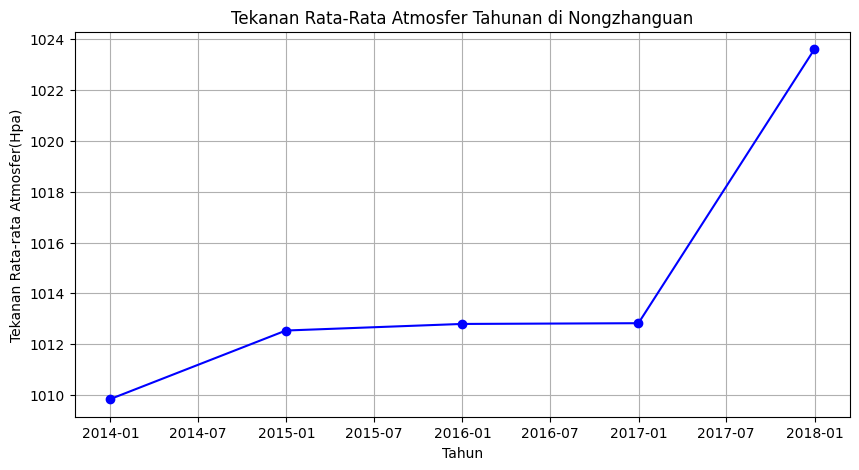

In [236]:
temp_years = Nongzhanguan_df.resample("YE").mean(numeric_only=True)

plt.figure(figsize=(10, 5))
plt.plot(temp_years.index, temp_years["PRES"], marker="o", linestyle="-", color="b")

plt.xlabel("Tahun")
plt.ylabel("Tekanan Rata-rata Atmosfer(Hpa)")
plt.title("Tekanan Rata-Rata Atmosfer Tahunan di Nongzhanguan")
plt.grid()
plt.show()

plt.show()

Pertanyaan 2: - Bagaimana Temperatur wilayah Nongzhanguan dalam periode tahun 2013 hingga 2017?

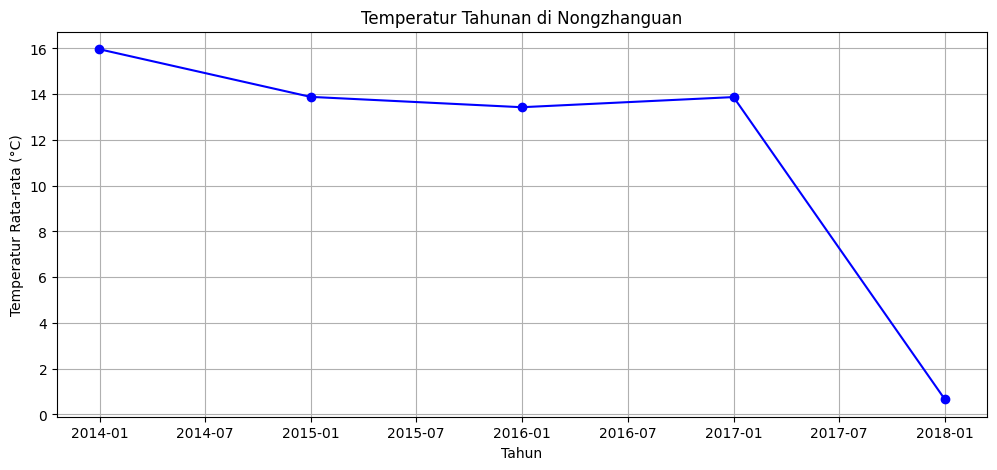

In [237]:

temp_years = Nongzhanguan_df.resample("YE").mean(numeric_only=True)

plt.figure(figsize=(12, 5))
plt.plot(temp_years.index, temp_years["TEMP"], marker="o", linestyle="-", color="b")

plt.xlabel("Tahun")
plt.ylabel("Temperatur Rata-rata (°C)")
plt.title("Temperatur Tahunan di Nongzhanguan")
plt.grid()
plt.show()

plt.show()